## Wearable devices data - regression model
This notebook is the example of the regression model based on the data collected from wearable devices.

**The target variable is:** performance score.

**The input variables include:**


In [5]:
# load recessary modules

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

# visualisation
import matplotlib.pyplot as plt

In [6]:
# Load and clean data
df = pd.read_csv('../data/raw/wearable_health_devices_performance_upto_26june2025.csv')
df = df.dropna(subset=['Performance_Score', 'Price_USD'])

# Features and target
features = ['Price_USD', 'Battery_Life_Hours', 'Brand', 'Category', 'Connectivity_Features']
df = df.dropna(subset=features + ['Performance_Score'])
X = df[features]
y = df['Performance_Score']

# Column types
num_features = ['Price_USD', 'Battery_Life_Hours']
cat_features = ['Brand', 'Category', 'Connectivity_Features']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])


In [13]:
# Define models with pipeline
models = {
    'LinearRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
}

# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
models.items()

dict_items([('LinearRegression', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price_USD',
                                                   'Battery_Life_Hours']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Category',
                                                   'Connectivity_Features'])])),
                ('regressor', LinearRegression())])), ('RandomForest', Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price_USD',
                                                   'Battery_Life_Hours']),
                                                 ('cat',
                                             

In [15]:
# Train and evaluate
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n{name}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")


LinearRegression
MAE: 1.14
R²: 0.92

RandomForest
MAE: 1.06
R²: 0.93


### Evaluating the regression model

Comparison between two regression models: linear and random forest
- Both models work quite nice with the R^2 more than 0.90

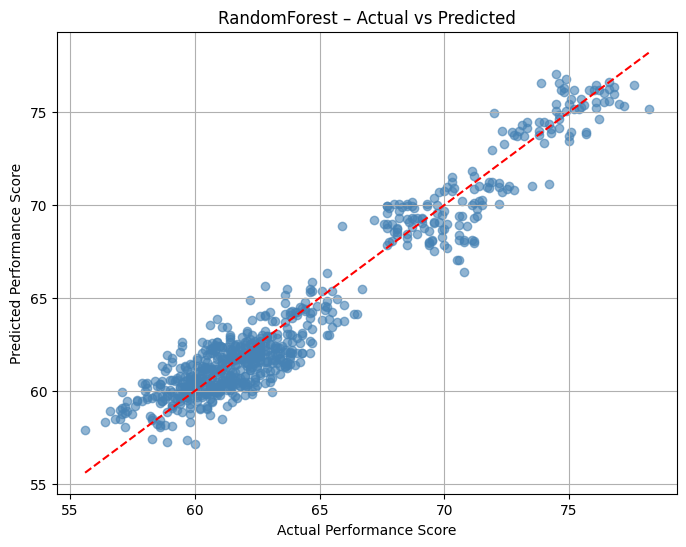

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title(f"{name} – Actual vs Predicted")
plt.grid(True)
plt.show()


Evaluating the model based on residual plot which provides the deviation between predicted values and the real values:
- plot below shows the residual values are around 0 with the different ranges between [-3;3] USD

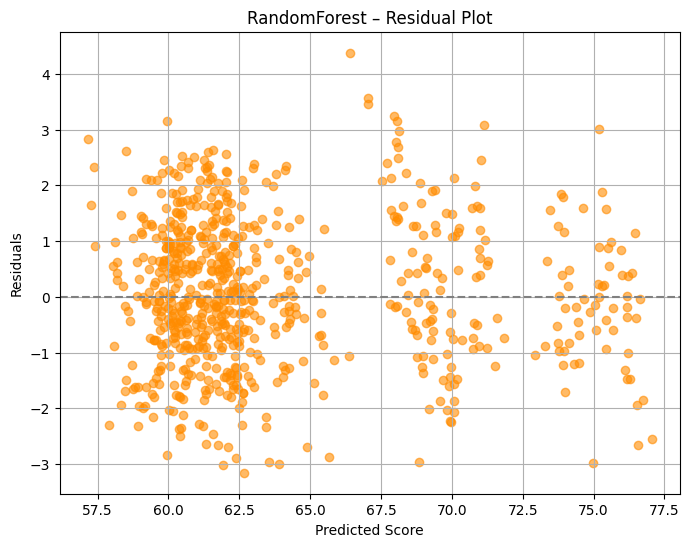

In [17]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='darkorange')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.title(f"{name} – Residual Plot")
plt.grid(True)
plt.show()


Below figure presents the importance of different input variables for the RandomForest model

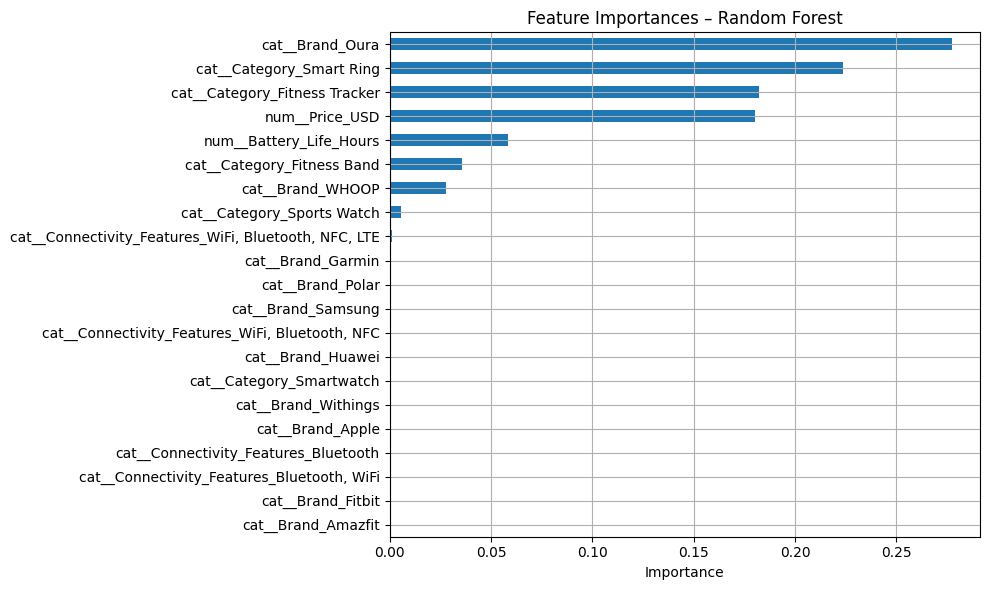

In [18]:
importances = models['RandomForest'].named_steps['regressor'].feature_importances_
feature_names = models['RandomForest'].named_steps['preprocessor'].get_feature_names_out()

# Plot
import pandas as pd
imp_df = pd.Series(importances, index=feature_names).sort_values(ascending=True)

imp_df.plot(kind='barh', figsize=(10, 6), title='Feature Importances – Random Forest')
plt.xlabel("Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


### Regression model with nunmeric values only

The models above include both categorical and numeric variables. Based on the variables' importance evaluation, the brand/category has the biggest impact on the price. Now the model with numeric variables only is tested to see how different results.